# Final Project - PretrainedDeployment
## E6692 Spring 2024


## Part 2.1: Pretrained Model Deployment

In this part we deploy a pretrained model, FaceNet, for detecting faces and regressing facial keypoints.

In [4]:
# import packages
import os
import cv2
import numpy as np
from IPython.display import Video, display

from utils.pretrained_deployment import download_images
from utils.display import *

device = 'cuda'

# reload modules every 2 seconds to see changes in notebook
%load_ext autoreload
%autoreload 2

%matplotlib inline

#### Download Data

First, we need some images to do inference with.

In **utils/pretrained_deployment.py** we provide the function **download_images()** for downloading google images.

<font color="red"><strong>TODO:</strong></font>  Use **download_images()** to download images of faces for inference.

In [5]:
###################################################
# TODO: Download images with faces for inference  #
#       using download_images().                  #
#                                                 #
#       Suggested queries are                     #
#       'faces', 'people', 'famous people', etc.  #
#       Be creative with your query to make       #
#       grading more entertaining.                #
#       Use the variables defined below.          #
###################################################

# query = None
# num_images = None
query = 'empire_state_building_from_the_ground'
num_images = 5

download_images(query, num_images)


###################################################
# END TODO                                        #
###################################################

Now we need to examine the downloaded images and verify that they are suitable (they contain faces) for inference.

<font color="red"><strong>TODO:</strong></font> Use the function **display_images()** in **utils/display.py** to display the first three images. 

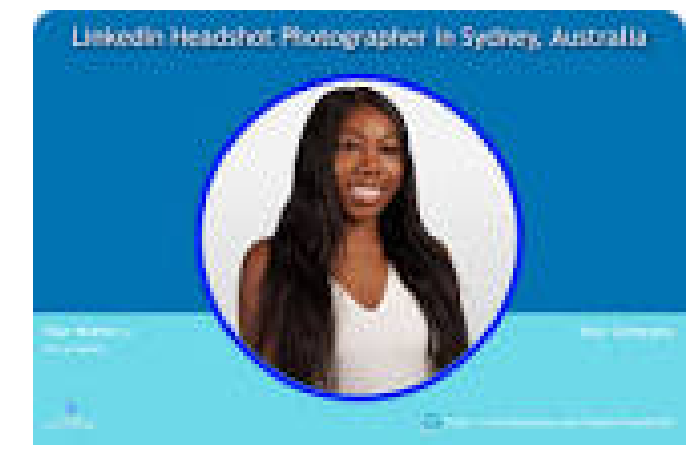

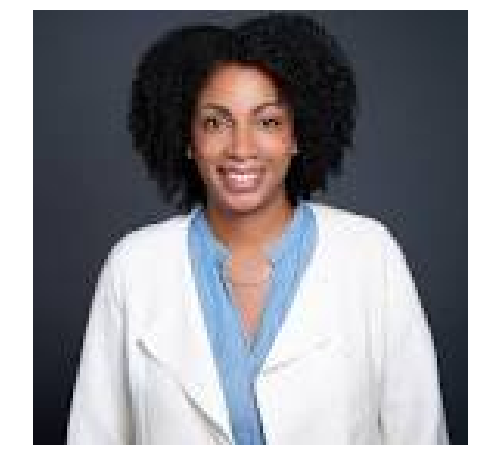

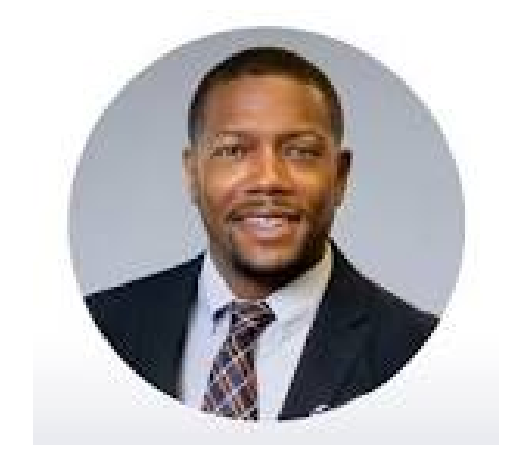

In [3]:
###################################################
# TODO:  Visualize the first 3 downloaded images  #
#        using display_images()                   #
###################################################
display_images(query, 3)


###################################################
# END TODO                                        #
###################################################

#### Comment on the images you downloaded. Are they suitable for inference? Are there any potential issues?

<font color="red"><strong>TODO:</strong></font> I think these images are great for inference. They pretty much will only ever have one person in them. Clear lightning and color. Potential issues could be bias for example from google's search but overall I think the nature of the files should be simple enough to prevent major issues. 


## FaceNet Inference

Now initialize the MTCNN face detection model. By default, the MTCNN model outputs cropped areas of the input where it detects faces. Initialize **MTCNN** with `select_largest=False`, `post_process=False`, `device=device`, and `keep_all=True`.

Visit https://github.com/timesler/facenet-pytorch for help with syntax.

In [3]:
###################################################
# TODO: Initialize the MTCNN FaceNet detector     #
#       with the configuration described above.   #
###################################################
from facenet_pytorch import MTCNN, InceptionResnetV1


mtcnn = MTCNN(select_largest=False, post_process=False, device=device, keep_all=True)


###################################################
# END TODO                                        #
###################################################


###################################################
# TODO: Print the model summary.                  #
#       In PyTorch this can be done with          #
#       "print(model)"                            #
###################################################
print(mtcnn)


###################################################
# END TODO                                        #
###################################################

MTCNN(
  (pnet): PNet(
    (conv1): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (prelu1): PReLU(num_parameters=10)
    (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=True)
    (conv2): Conv2d(10, 16, kernel_size=(3, 3), stride=(1, 1))
    (prelu2): PReLU(num_parameters=16)
    (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (prelu3): PReLU(num_parameters=32)
    (conv4_1): Conv2d(32, 2, kernel_size=(1, 1), stride=(1, 1))
    (softmax4_1): Softmax(dim=1)
    (conv4_2): Conv2d(32, 4, kernel_size=(1, 1), stride=(1, 1))
  )
  (rnet): RNet(
    (conv1): Conv2d(3, 28, kernel_size=(3, 3), stride=(1, 1))
    (prelu1): PReLU(num_parameters=28)
    (pool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
    (conv2): Conv2d(28, 48, kernel_size=(3, 3), stride=(1, 1))
    (prelu2): PReLU(num_parameters=48)
    (pool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
    (conv3): Conv2d(48, 64,

<font color="red"><strong>TODO:</strong></font> Implement the function **display_faces()** in **utils/display.py**. 

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /media/nvidia/NVME/pytorch/pytorch-v1.9.0/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


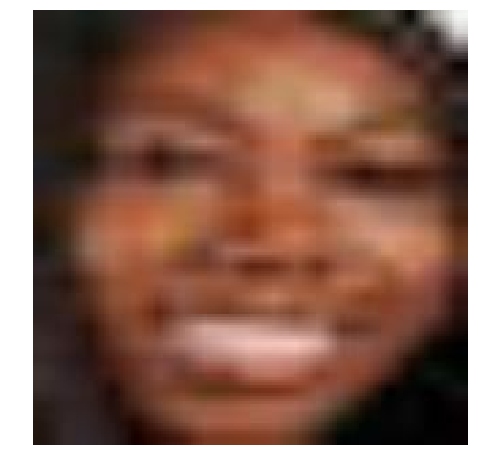

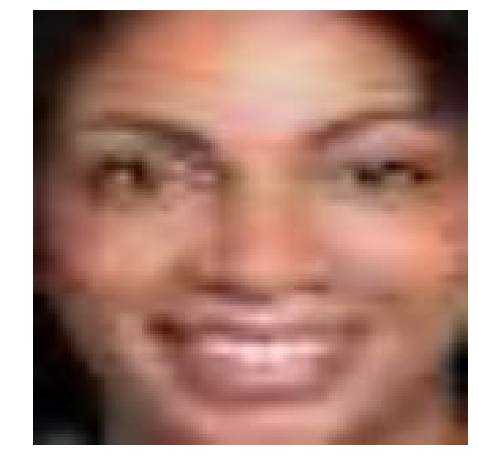

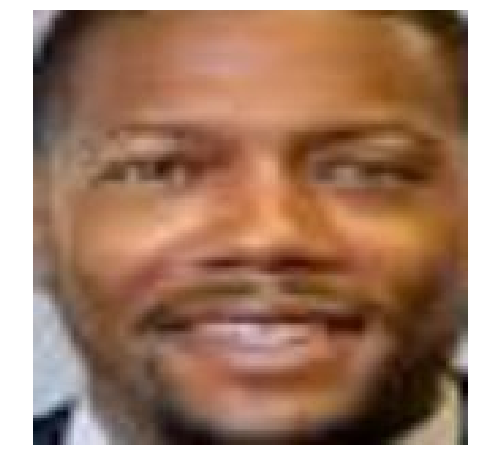

In [5]:
###################################################
# TODO: Use display_faces() to display the faces  #
#       of the first three images                 #
###################################################

display_faces(query, mtcnn, 3)

###################################################
# END TODO                                        #
###################################################

This model is called a Multi-task CNN because it detects faces **and** regresses keypoints (or landmarks) of the face including eye, nose, and mouth locations. Here we explore the keypoint regression functionality.

<font color="red"><strong>TODO:</strong></font> Implement the functions **draw_boxes_and_landmarks()** and **display_detection_and_keypoints()** in **utils/display.py**. The default forward pass of MTCNN returns cropped faces, but this implementation also has a `.detect()` method for returning face and keypoint locations in the image. Use `MTCNN.detect()` with `landmarks=True` to implement **display_detection_and_keypoints()**.

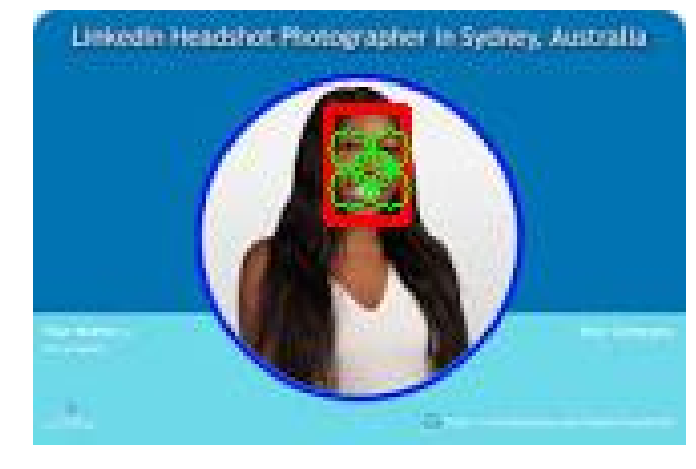

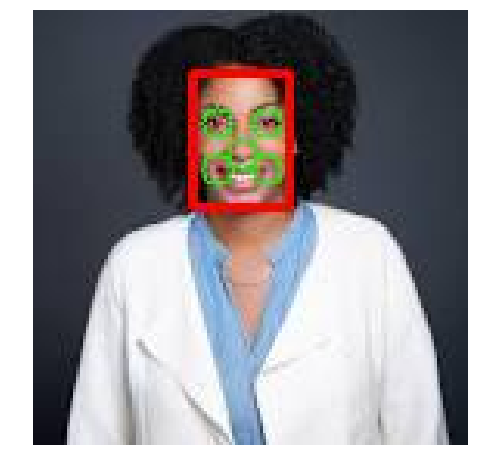

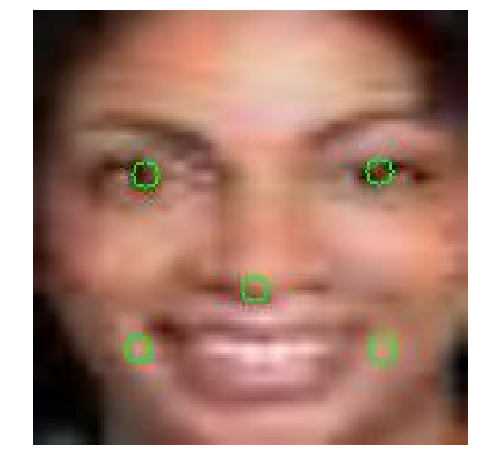

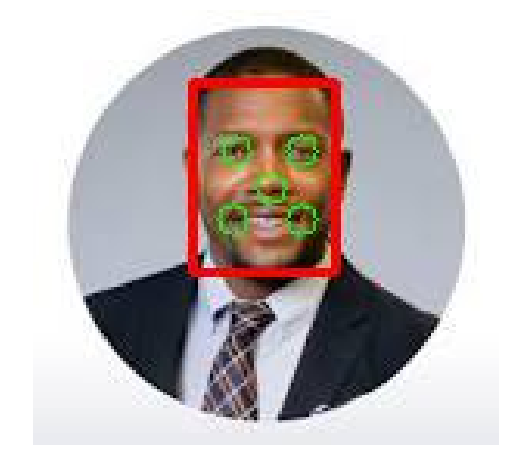

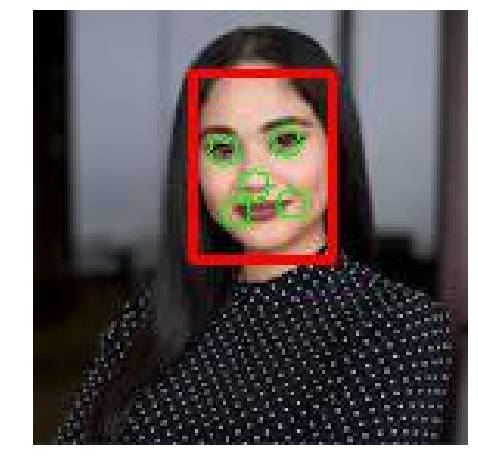

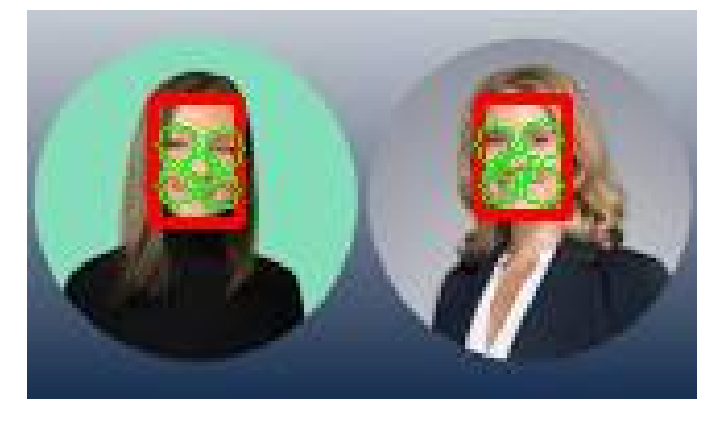

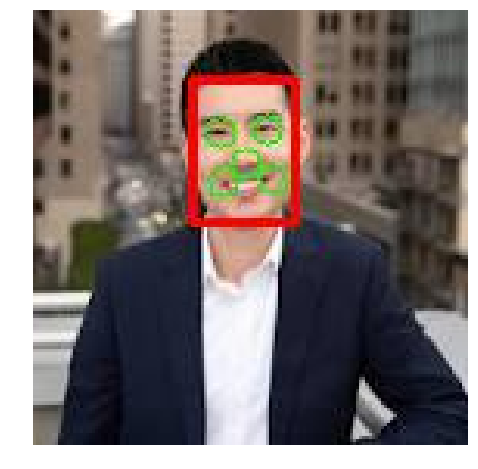

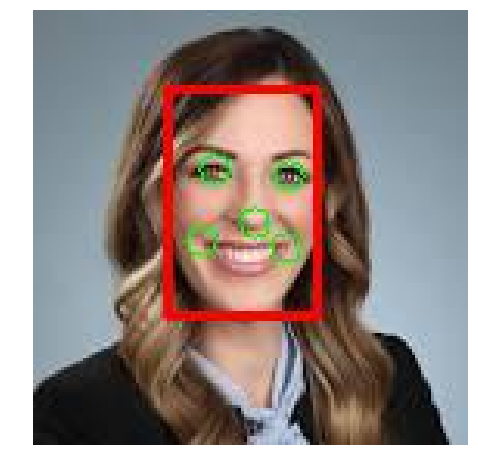

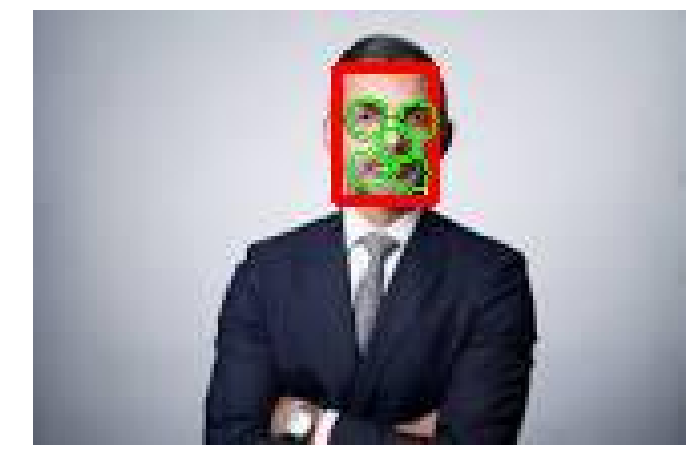

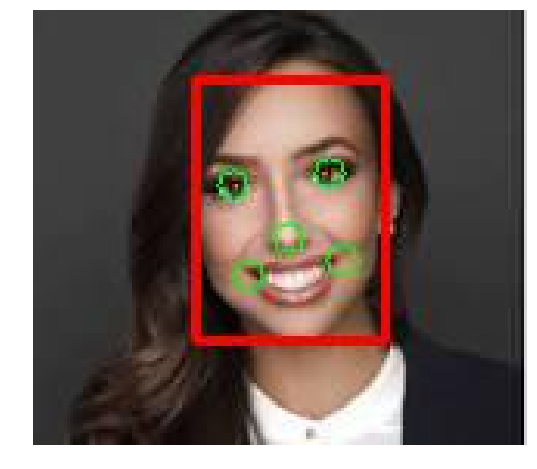

In [16]:
###################################################
# TODO: Use display_detection_and_keypoints()     #
#       to display the first three images with    #
#       faces and keypoints indicated.            #
###################################################

display_detection_and_keypoints(query, mtcnn, 10)

###################################################
# END TODO                                        #
###################################################

### Comment on the accuracy of the face detection and keypoint regression. Where does the model perform well and where does it fail?

<font color="red"><strong>TODO:</strong></font>  Overall the face detectiona and keypoint regression seems to be very accurate and perform very well. I believe that my choices in data are likely a big key here. My query of single linkedin headshots provides high quality images with great lighting and clarity. This makes the models job very easy. 

## FaceNet Video Inference

<font color="red"><strong>TODO:</strong></font> Run the cell below to view a clip from [the Princess Bride](https://youtu.be/dTRKCXC0JFg?t=3).

In [13]:
video_path = os.path.join(DATA_PATH, 'PrincessBride.mp4') # define path to video
Video(video_path, width=960, height=540) # embed video in JupyterLab

<font color="red"><strong>TODO:</strong></font>  Now finish the function **video_inference()** in **utils/display.py**. 

In [14]:
###################################################
# TODO: Perform inference on the video above with #
#       the function video_inference().           #
#                                                 #
#       Perform inference on at least 30 frames.  #
#       The whole video may take a long time.     #
###################################################

detected_video_path = video_inference(video_path, mtcnn, 90)

###################################################
# END TODO                                        #
###################################################

Frames detected:  10
Frames detected:  20
Frames detected:  30
Frames detected:  40
Frames detected:  50
Frames detected:  60
Frames detected:  70
Frames detected:  80
Frames detected:  90


<font color="red"><strong>TODO:</strong></font>  Run the cell below to view the detected video.

In [15]:
Video(detected_video_path, width=960, height=540, embed=True)

## Part 2.2: Pretrained Model Inference with Webcam


Now we will integrate FaceNet into the webcam stream. To use the webcam, you will need to mount the docker with the USB camera connected and the tag `--device /dev/video0` specified.

<font color="red"><strong>TODO:</strong></font>  Verify the camera is accessible by running the cell below.

In [7]:
!ls -ltrh /dev/video*

crw-rw---- 1 root video 81, 0 Feb  6 22:38 /dev/video0


<font color="red"><strong>TODO:</strong></font>  Finish the function **webcam_inference()** in **utils/display.py** to perform face detection and keypoint regression with the camera feed. 

In [12]:
###################################################
# TODO: Use webcam_inference() to display FaceNet #
#       inference on the camera feed.             #
###################################################
webcam_inference(mtcnn)

###################################################
# END TODO                                        #
###################################################


Video feed started.


error: OpenCV(4.5.0) /opt/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


### Insert a screenshot of the webcam inference with bounding box detection and keypoint regression of your face

<font color="red"><strong>TODO:</strong></font>  Insert screenshot here.
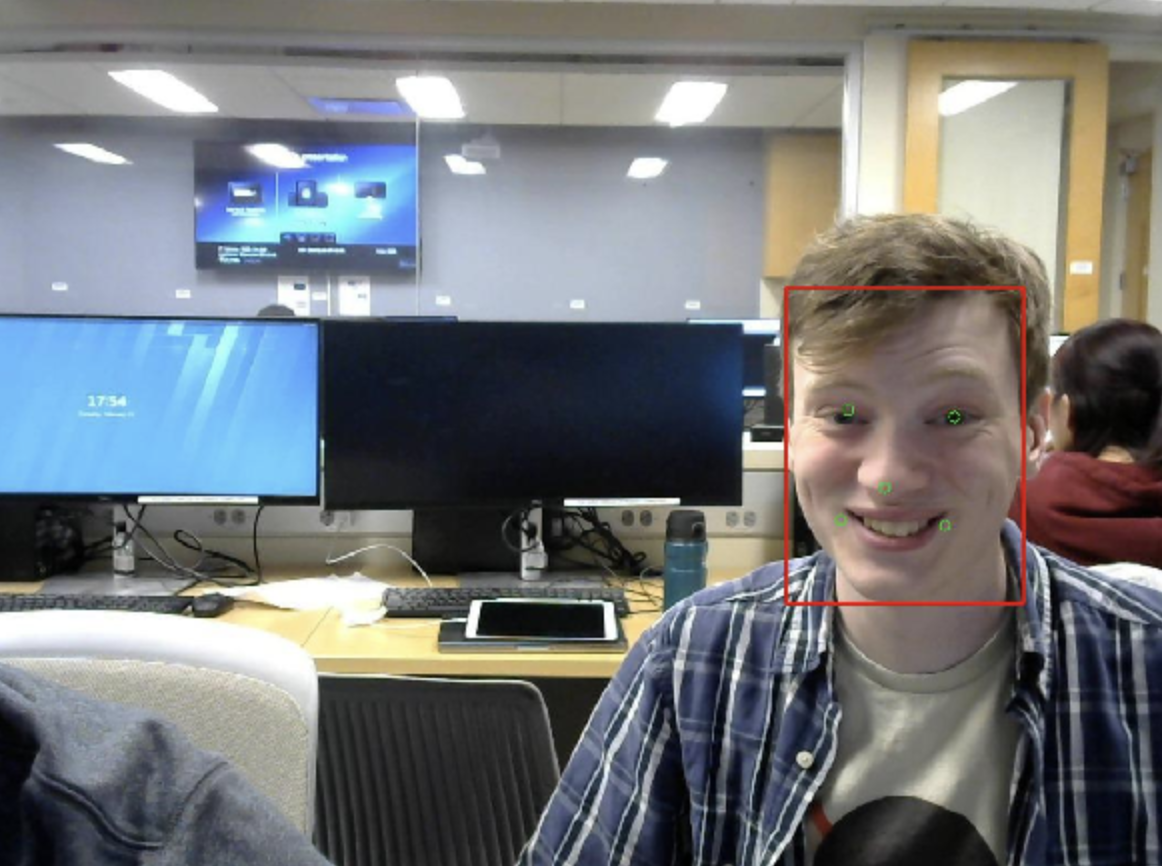


### Comment on the effectiveness of the video inference and keypoint regression. Is the video feed operating in real time? What can be done to improve the inference speed?

<font color="red"><strong>TODO:</strong></font> Your answer here.

The overall effectiveness was not good. It was not able to operate in real time at all. Perhaps my algorithms for drawing the boxes and the landmarks was too slow. However, it seemed the real problem was that the detection algorithm was far too slow. There were also hardware problems. The Jetson started heating up dramatically and seemed to overall start to suffer problems because of that. In theory this could be very effective with perhaps more optimized code and better hardware. 